In [15]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [16]:
# load the csv data file
# 10.881, 267, 1
tape = np.loadtxt('Tapes/UoB_Set01_2025-01-02tapes.csv', delimiter=',', dtype=str)
x = tape[:,0].astype(float)
y = tape[:,1].astype(float)
z = tape[:,2].astype(float)
print("shape is {}".format(y.shape))
print("min price is {}".format(np.min(y)))
print("max price is {}".format(np.max(y)))

shape is (23811,)
min price is 243.0
max price is 303.0


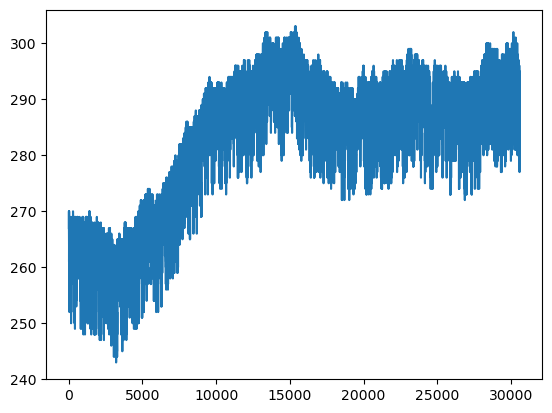

In [17]:
fig, ax = plt.subplots()
# ax.figure.set_size_inches(120, 60)
ax.plot(x, y)

(array([   5.,   10.,   58.,  105.,  194.,  278.,  474.,  722.,  770.,
         754.,  768.,  734.,  562.,  371.,  344.,  372.,  450.,  522.,
         727., 1196., 1909., 2235., 2327., 2252., 2053., 1582., 1004.,
         564.,  347.,  122.]),
 array([243., 245., 247., 249., 251., 253., 255., 257., 259., 261., 263.,
        265., 267., 269., 271., 273., 275., 277., 279., 281., 283., 285.,
        287., 289., 291., 293., 295., 297., 299., 301., 303.]),
 <BarContainer object of 30 artists>)

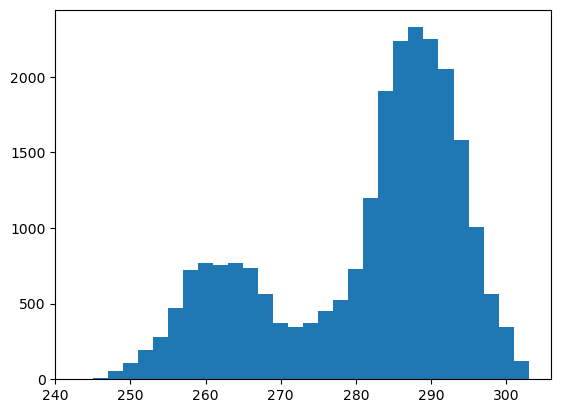

In [22]:
plt.hist(y, bins=30)

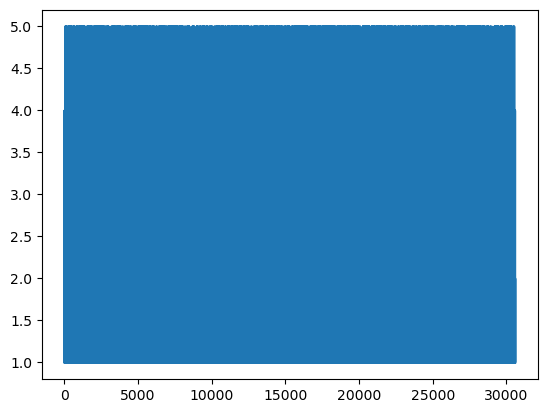

In [23]:
# plt.figure(figsize=(150, 50))
plt.plot(x, z)

shape is (26009,)
min price is 270.0
max price is 317.0


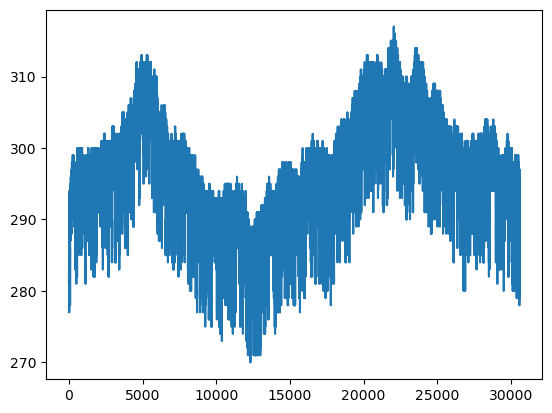

In [24]:
tape = np.loadtxt('Tapes/UoB_Set01_2025-01-03tapes.csv', delimiter=',', dtype=str)
x = tape[:,0].astype(float)
y = tape[:,1].astype(float)
print("shape is {}".format(y.shape))
print("min price is {}".format(np.min(y)))
print("max price is {}".format(np.max(y)))

fig, ax = plt.subplots()
# ax.figure.set_size_inches(120, 60)
ax.plot(x, y)

(array([1.000e+00, 1.100e+01, 7.000e+00, 8.000e+00, 1.900e+01, 4.500e+01,
        4.800e+01, 6.500e+01, 7.700e+01, 1.310e+02, 1.580e+02, 1.900e+02,
        2.440e+02, 3.180e+02, 3.880e+02, 4.460e+02, 0.000e+00, 5.670e+02,
        7.450e+02, 7.960e+02, 9.210e+02, 1.087e+03, 1.107e+03, 1.147e+03,
        1.317e+03, 1.377e+03, 1.386e+03, 1.283e+03, 1.313e+03, 1.449e+03,
        1.162e+03, 1.079e+03, 9.740e+02, 0.000e+00, 8.800e+02, 8.160e+02,
        6.720e+02, 6.770e+02, 6.230e+02, 5.570e+02, 4.680e+02, 4.300e+02,
        3.580e+02, 2.890e+02, 2.130e+02, 6.900e+01, 5.400e+01, 3.000e+01,
        2.000e+00, 5.000e+00]),
 array([270.  , 270.94, 271.88, 272.82, 273.76, 274.7 , 275.64, 276.58,
        277.52, 278.46, 279.4 , 280.34, 281.28, 282.22, 283.16, 284.1 ,
        285.04, 285.98, 286.92, 287.86, 288.8 , 289.74, 290.68, 291.62,
        292.56, 293.5 , 294.44, 295.38, 296.32, 297.26, 298.2 , 299.14,
        300.08, 301.02, 301.96, 302.9 , 303.84, 304.78, 305.72, 306.66,
        307.6 , 

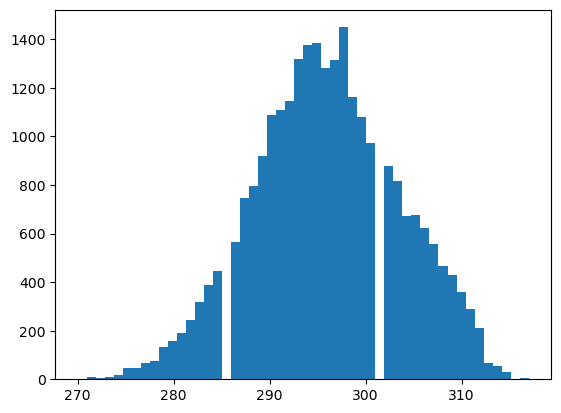

In [25]:
# plotting distribution of prices
plt.hist(y, bins=50)


In [31]:
import json
import pandas as pd
import warnings

def parse_lob(data_str):
    timestamps = []
    bids = []
    asks = []

    for i in range(len(data_str)):
        data_str_line = data_str[i].replace('Exch0', '"Exch0"')
        data_str_line = data_str_line.replace("'bid'", '"bid"')
        data_str_line = data_str_line.replace("'ask'", '"ask"')

        data_list = json.loads(data_str_line)

        # Extract exchange rate and exchange name
        exchange_rate = data_list[0]

        # Extract bid and ask data
        bid_data = data_list[2][0][1]
        ask_data = data_list[2][1][1]

        timestamps.append(exchange_rate)
        bids.append([bid_data])
        asks.append([ask_data])

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)

        # Create DataFrames once after the loop
        df = pd.DataFrame({
            'Timestamp': timestamps,
            'Bid': bids,
            'Ask': asks
        })

    # Concatenate nested lists within DataFrame columns
    df['Bid'] = df['Bid'].apply(lambda x: x[0])
    df['Ask'] = df['Ask'].apply(lambda x: x[0])

    return df

# Specify the path to your text file
file_path = 'LOBs/UoB_Set01_2025-01-02LOBs.txt'

# Example usage:
with open(file_path, 'r') as file:
    data_str = file.readlines()

result_df = parse_lob(data_str)
result_df[:20].to_csv('result.csv')
print(result_df[:20])


    Timestamp                   Bid  \
0       0.000                    []   
1       0.279              [[1, 6]]   
2       1.333              [[1, 6]]   
3       1.581              [[1, 6]]   
4       1.643              [[1, 6]]   
5       1.736    [[261, 1], [1, 6]]   
6       1.984    [[261, 1], [1, 6]]   
7       2.015    [[261, 1], [1, 6]]   
8       2.139    [[261, 1], [1, 6]]   
9       2.697  [[262, 6], [261, 1]]   
10      3.069  [[262, 6], [261, 1]]   
11      3.131  [[262, 6], [261, 1]]   
12      3.255  [[262, 6], [261, 1]]   
13      3.286  [[262, 6], [261, 1]]   
14      3.441  [[263, 6], [261, 1]]   
15      3.782  [[263, 6], [261, 1]]   
16      3.813  [[264, 6], [261, 1]]   
17      3.906  [[264, 6], [261, 1]]   
18      4.216  [[264, 6], [261, 1]]   
19      4.340  [[264, 6], [261, 1]]   

                                                  Ask  
0                                                  []  
1                                                  []  
2           

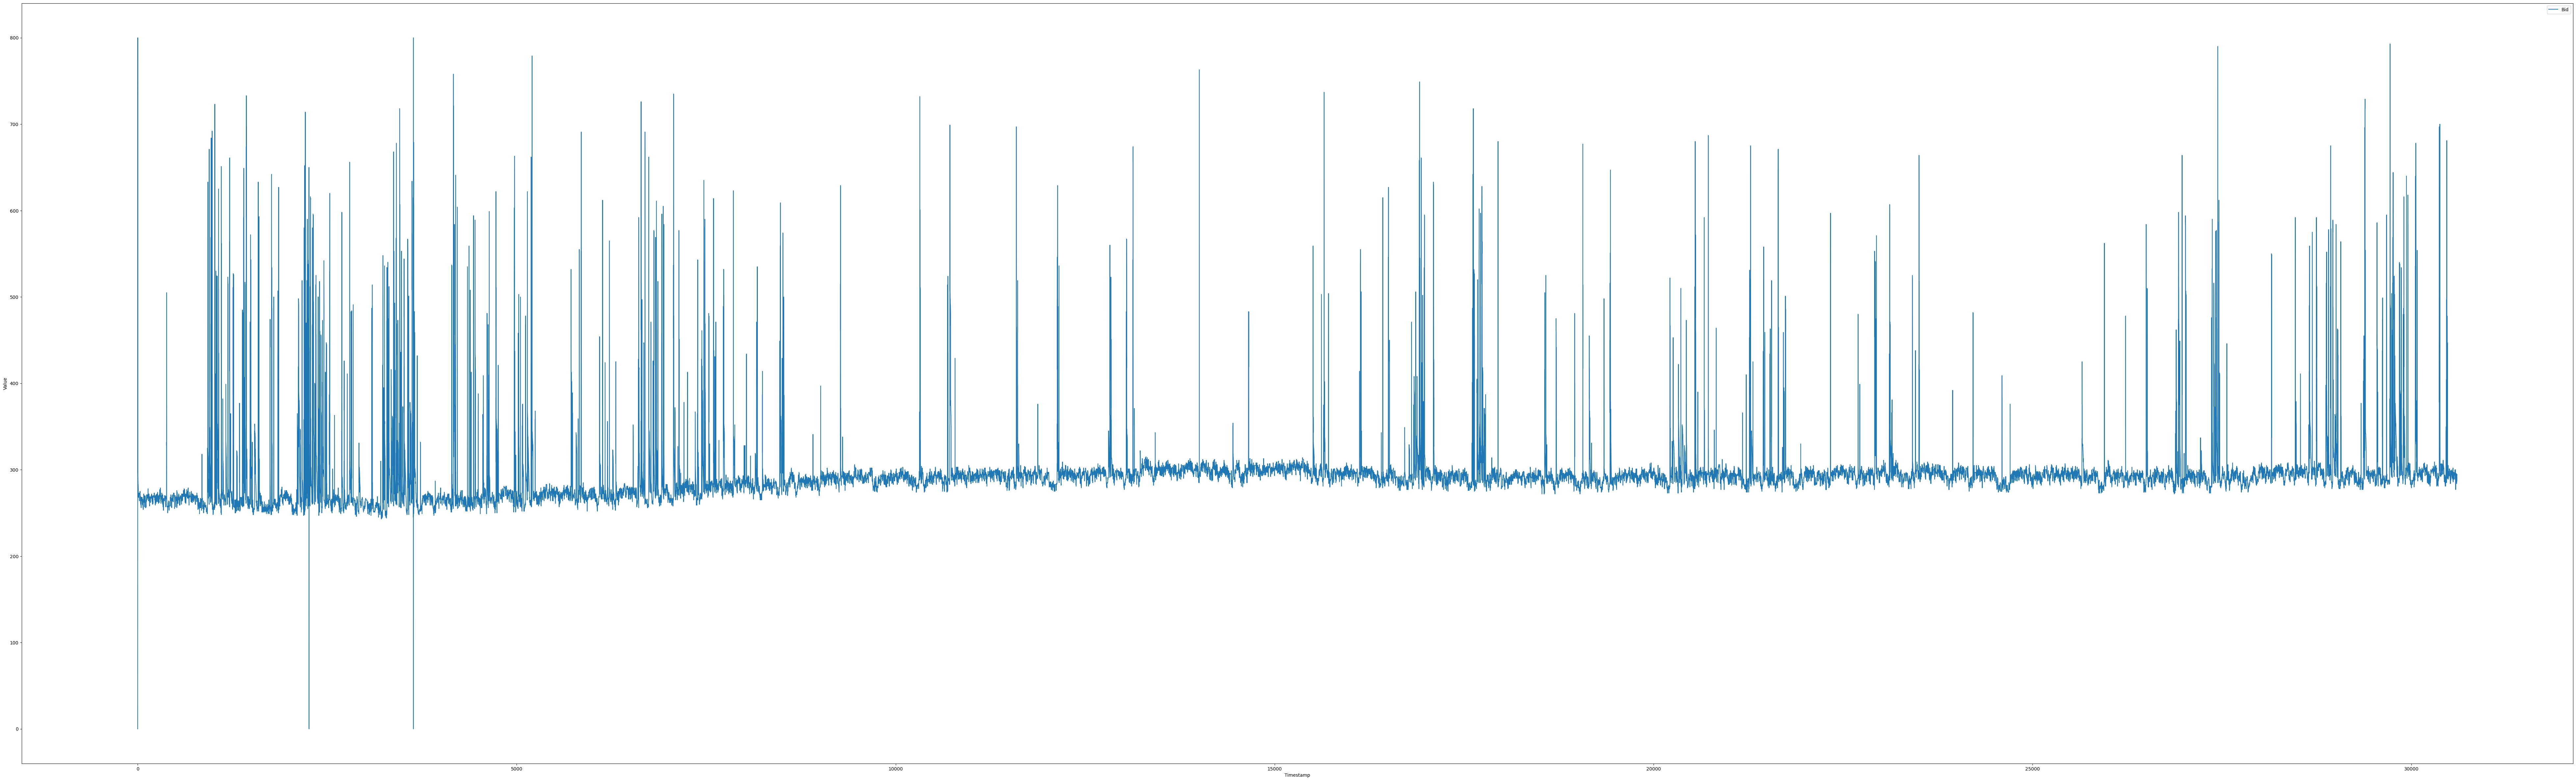

In [32]:
# Extracting values for plotting
timestamps = result_df['Timestamp']
bid_values = [bid[0][0] if bid else 0 for bid in result_df['Bid']]
ask_values = [ask[0][0] if ask else 0 for ask in result_df['Ask']]
# print(bid_values[:1000])

# Plotting
# plt.figure(figsize=(100, 30))
plt.plot(timestamps, ask_values, label='Bid')
# plt.plot(timestamps, ask_values, label='Ask')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [33]:
# this cell is an example parsing of one entry
input_string = '[3.069, "Exch0", [["bid", [[262, 6], [261, 1]]], ["ask", [[296, 1], [297, 5], [338, 3], [797, 1]]]]]'
input_string2 = '[30599.945, "Exch0", [["bid", [[288, 1], [281, 4], [278, 1], [270, 4], [269, 1], [218, 1], [56, 5], [27, 4], [19, 2]]], ["ask", [[294, 1], [397, 5], [401, 5], [714, 3]]]]]'

# Load data using json.loads
data_list = json.loads(input_string2)

# Extract exchange rate and exchange name
exchange_rate = data_list[0]
exchange_name = data_list[1]

# Extract bid and ask data
bid_data = data_list[2][0][1]
ask_data = data_list[2][1][1]

# Create DataFrames
timestamp_df = pd.DataFrame([exchange_rate], columns=['Timestamp'])
bid_df = pd.DataFrame([[bid_data]], columns=['Bid'])
ask_df = pd.DataFrame([[ask_data]], columns=['Ask'])

# Concatenate DataFrames horizontally
result_df = pd.concat([timestamp_df, bid_df, ask_df], axis=1)

# Display the final DataFrame
print(result_df)
result_df.to_csv('result.csv')

   Timestamp                                                Bid  \
0  30599.945  [[288, 1], [281, 4], [278, 1], [270, 4], [269,...   

                                        Ask  
0  [[294, 1], [397, 5], [401, 5], [714, 3]]  


In [36]:
import ast  # To safely evaluate strings containing Python literals

# read the lob.csv file and plot the distribution of bid and ask prices
lob = pd.read_csv('lob.csv')
print(lob.head(10))

# Since the 'Bid' and 'Ask' columns are stored as string representations of lists, we need to convert them back to lists.
lob['Bid'] = lob['Bid'].apply(ast.literal_eval)
lob['Ask'] = lob['Ask'].apply(ast.literal_eval)

# Extract all bid and ask prices
bid_prices_csv = [price for sublist in lob['Bid'] for price, qty in sublist]
ask_prices_csv = [price for sublist in lob['Ask'] for price, qty in sublist]


   Unnamed: 0  Timestamp                   Bid                             Ask
0           0      0.000                    []                              []
1           1      0.279              [[1, 6]]                              []
2           2      1.333              [[1, 6]]                      [[800, 1]]
3           3      1.581              [[1, 6]]                      [[799, 1]]
4           4      1.643              [[1, 6]]                      [[798, 1]]
5           5      1.736    [[261, 1], [1, 6]]                      [[798, 1]]
6           6      1.984    [[261, 1], [1, 6]]                      [[797, 1]]
7           7      2.015    [[261, 1], [1, 6]]            [[338, 3], [797, 1]]
8           8      2.139    [[261, 1], [1, 6]]  [[297, 5], [338, 3], [797, 1]]
9           9      2.697  [[262, 6], [261, 1]]  [[297, 5], [338, 3], [797, 1]]


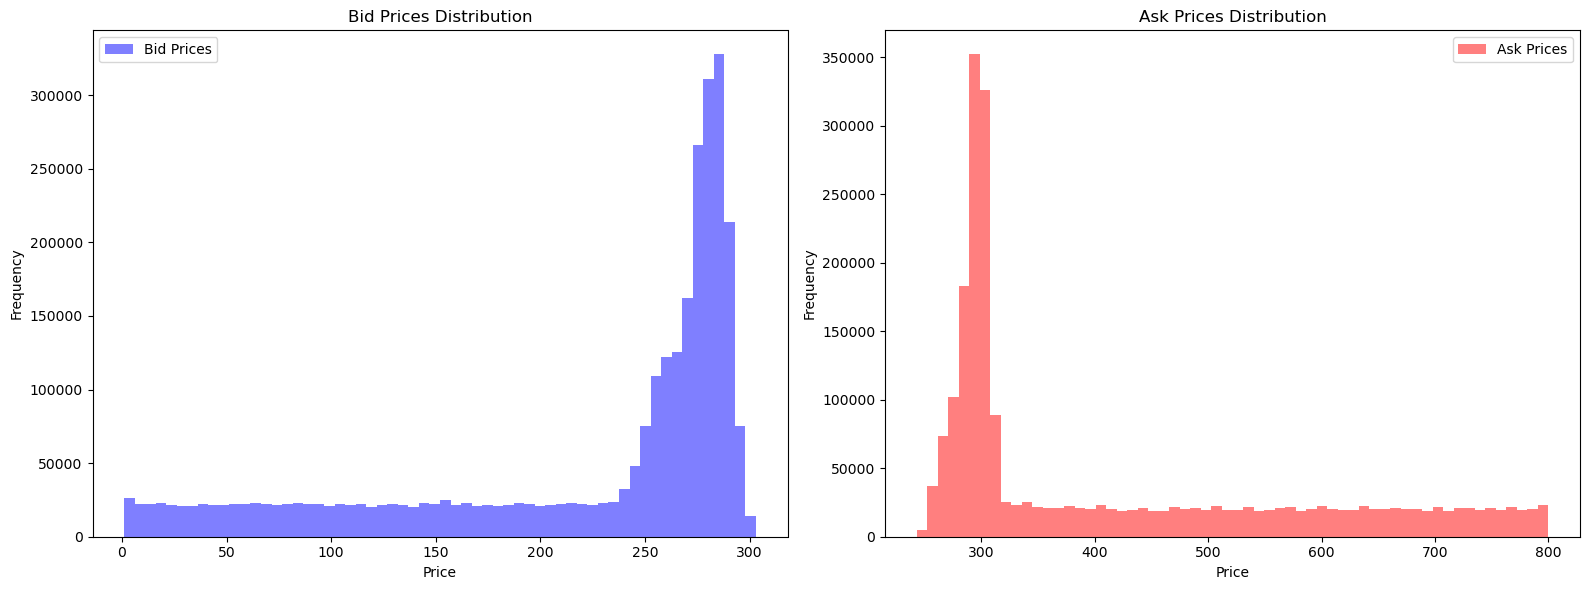

In [37]:
# Creating subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for Bid Prices
axs[0].hist(bid_prices_csv, alpha=0.5, label='Bid Prices', color='blue', bins=60)
axs[0].set_title('Bid Prices Distribution')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot for Ask Prices
axs[1].hist(ask_prices_csv, alpha=0.5, label='Ask Prices', color='red', bins=60)
axs[1].set_title('Ask Prices Distribution')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()

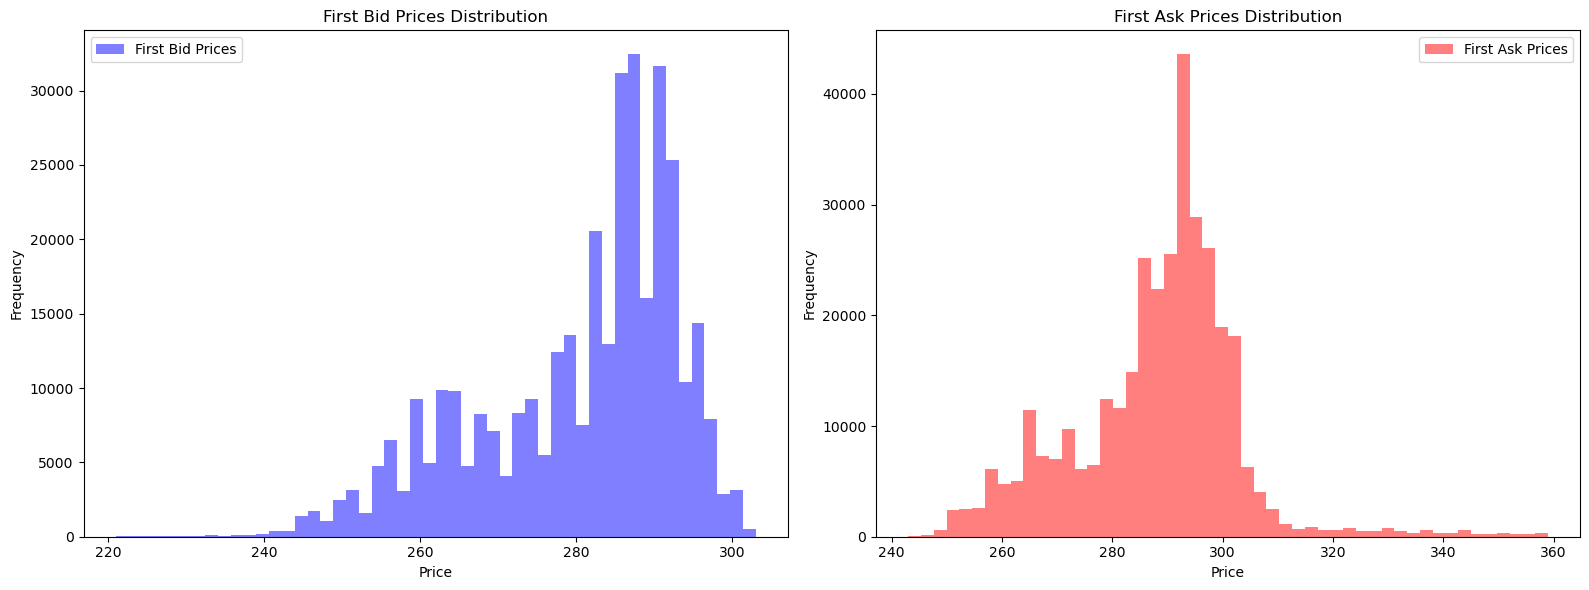

In [44]:
# Adjusting the code to plot histograms of only the first price in each list for both bid and ask

# Extracting the first price of each list for bid and ask prices
first_bid_prices_csv = [sublist[0][0] for sublist in lob['Bid'] if sublist and sublist[0][0] >220]
first_ask_prices_csv = [sublist[0][0] for sublist in lob['Ask'] if sublist and sublist[0][0] <360]

# Creating subplots for the first price
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for First Bid Prices
axs[0].hist(first_bid_prices_csv, alpha=0.5, label='First Bid Prices', color='blue', bins=50)
axs[0].set_title('First Bid Prices Distribution')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot for First Ask Prices
axs[1].hist(first_ask_prices_csv, alpha=0.5, label='First Ask Prices', color='red', bins=50)
axs[1].set_title('First Ask Prices Distribution')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()


124


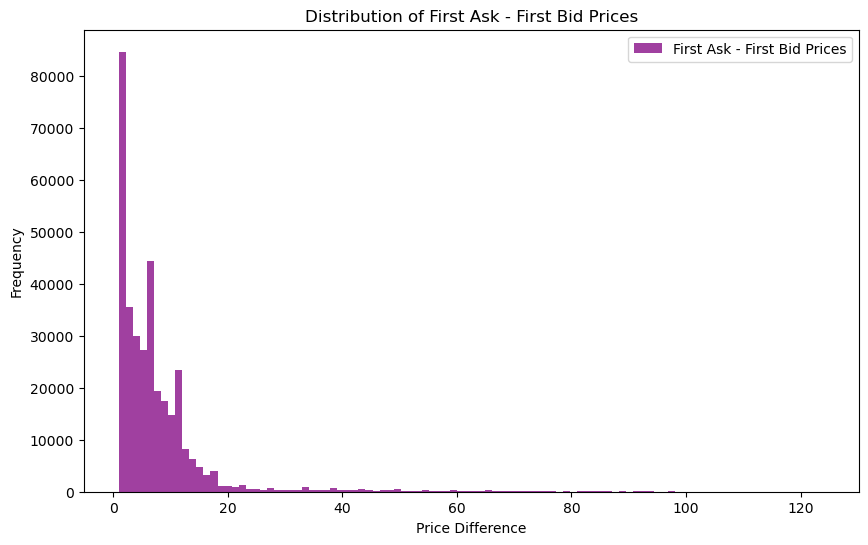

In [45]:
# Calculating the difference between the first ask and first bid prices for each row where both are available
ask_bid_diff = [sublist_ask[0][0] - sublist_bid[0][0] for sublist_ask, sublist_bid in zip(lob['Ask'], lob['Bid']) if sublist_ask and sublist_bid and sublist_ask[0][0] < 360 and sublist_bid[0][0] > 220]
print(max(ask_bid_diff))
# Plotting the histogram of the first ask minus first bid
plt.figure(figsize=(10, 6))
plt.hist(ask_bid_diff, alpha=0.75, label='First Ask - First Bid Prices', color='purple', bins=100)
plt.title('Distribution of First Ask - First Bid Prices')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()
